.
.
.
.
.
part of main program
.
.
.
.
.

In [1]:
# some import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import os

/home/oleg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [26]:
df = pd.read_excel(
                "data.xlsx", 
                sheet_name="горизонталь"
              )

# df.loc[len(df.index)] = df.mean(axis=0)
df = pd.DataFrame([df["время_колебаний"],  df["количество_колебаний"], df["количество_шаров"]]).transpose()
df

,время_колебаний,количество_колебаний,количество_шаров
0,23.15,5.0,12.0
1,15.19,5.0,12.0
2,14.26,5.0,11.0
3,26.56,10.0,10.0
4,23.93,10.0,9.0
5,21.00,10.0,8.0
6,19.00,10.0,7.0
7,16.25,10.0,6.0
8,13.40,10.0,5.0
9,11.38,10.0,4.0


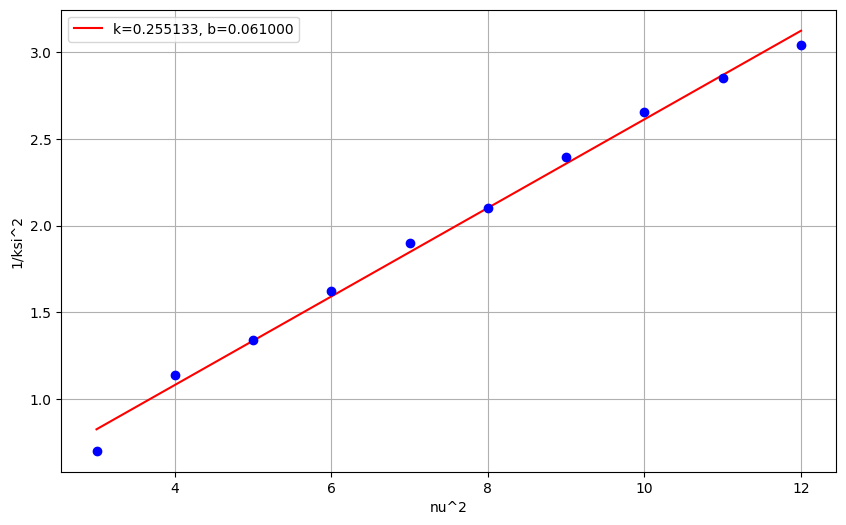

0.06882110232558138


In [18]:
# data analise
y = df["время_колебаний"]/df["количество_колебаний"].to_list()
x = df["количество_шаров"].to_list()
x = x[1:]
y = y[1:]
plt.figure(figsize=(10,6))
# plt.title('Зависимость teta от R')
plt.xlabel('nu^2')
plt.ylabel('1/ksi^2')
plt.grid()
plt.errorbar(x, y, yerr=0.000004, xerr=0, fmt='ob')
p=np.polyfit(x, y, 1)
# p = [p[0]+0.01, p[1]]
xx=np.linspace(min(x), max(x), 100)
yy=np.polyval(p, xx)
plt.plot(xx, yy, '-r', label=f'k={p[0]:.6f}, b={p[1]:.6f}')
plt.legend()
plt.savefig("./pictures/data1.png", bbox_inches='tight')
plt.show()
# gl1 = f'k={1/p[0]:.6f}'
# print(gl1)
# print(p)
print(sum([i**2 for i in y])/sum([i**2 for i in x]))

In [20]:
df = pd.read_excel(
                "data.xlsx", 
                sheet_name="вертикаль"
              )

# df.loc[len(df.index)] = df.mean(axis=0)
# df = pd.DataFrame([df["время_колебаний"],  df["количество_колебаний"], df["количество_шаров"]]).transpose()
df["moment"] = df["масса"] * df["плечо"] * 9.81
df

,количество_шаров,плечо,масса,moment
0,12,5,0.195,9.56475
1,10,4,0.161,6.31764
2,8,2,0.159,3.11958
3,6,2,0.134,2.62908
4,4,1,0.349,3.42369


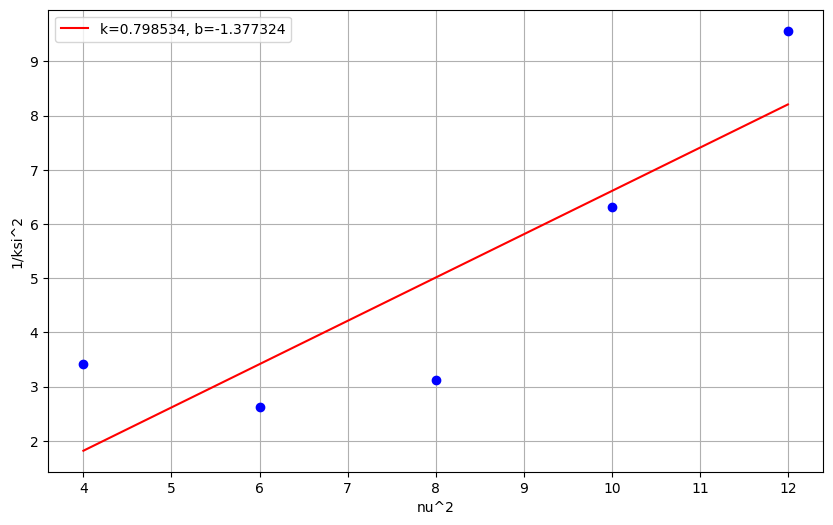

0.4437847554750001


In [24]:
# data analise
y = df["moment"]
x = df["количество_шаров"]
# x, y = x[:3], y[:3]
plt.figure(figsize=(10,6))
# plt.title('Зависимость teta от R')
plt.xlabel('nu^2')
plt.ylabel('1/ksi^2')
plt.grid()
plt.errorbar(x, y, yerr=0.000004, xerr=0, fmt='ob')
p=np.polyfit(x, y, 1)
# p = [p[0]+0.01, p[1]]
xx=np.linspace(min(x), max(x), 100)
yy=np.polyval(p, xx)
plt.plot(xx, yy, '-r', label=f'k={p[0]:.6f}, b={p[1]:.6f}')
plt.legend()
plt.savefig("./pictures/data2.png", bbox_inches='tight')
plt.show()
# gl1 = f'k={1/p[0]:.6f}'
# print(gl1)
# print(p)
print(sum([i**2 for i in y])/sum([i**2 for i in x]))

.
.
.
.
.
part of LaTex
.
.
.
.
.

In [27]:
# tables from  exel to LaTex



titles = []

# for column in titles:
#     data = df.to_latex
data = df.to_latex(index=False)
print(data)

\begin{tabular}{rrr}
\toprule
время_колебаний & количество_колебаний & количество_шаров \\
\midrule
23.150000 & 5.000000 & 12.000000 \\
15.190000 & 5.000000 & 12.000000 \\
14.260000 & 5.000000 & 11.000000 \\
26.560000 & 10.000000 & 10.000000 \\
23.930000 & 10.000000 & 9.000000 \\
21.000000 & 10.000000 & 8.000000 \\
19.000000 & 10.000000 & 7.000000 \\
16.250000 & 10.000000 & 6.000000 \\
13.400000 & 10.000000 & 5.000000 \\
11.380000 & 10.000000 & 4.000000 \\
7.030000 & 10.000000 & 3.000000 \\
\bottomrule
\end{tabular}

